In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
# define function to map higher order polynomial features
def mapFeature(X1, X2, degree):
    res = np.ones(X1.shape[0])
    for i in range(1,degree + 1):
        for j in range(0,i + 1):
            res = np.column_stack((res, (X1 ** (i-j)) * (X2 ** j)))
    
    res = np.delete(res, 0, 1)
    return res

In [3]:
def load_datasets(filename, data_columns, target_column):
    df = pd.read_csv(filename)
    X, y = df[data_columns], df[target_column]
    return X, y

In [4]:
def plot_data(A, b, test = False):
    positive_indices = np.where(b == 1)[0]
    negative_indices = np.where(b == 0)[0]
    
    plt.scatter(A.iloc[positive_indices, 0], A.iloc[positive_indices, 1], marker='x', c= 'yellow' if test else 'green')
    plt.scatter(A.iloc[negative_indices, 0], A.iloc[negative_indices, 1], marker='+', c= 'blue' if test else 'red')

In [5]:
def decision_boundary(X, y, mean, std, theta, degree):
    u = np.linspace(X.min().min(), X.max().max(), 50)
    v = np.linspace(X.min().min(), X.max().max(), 50)
    U,V = np.meshgrid(u, v)
    
    # convert U, V to vectors for calculating additional features
    # using vectorized implementation
    U = np.ravel(U)
    V = np.ravel(V)
    Z = np.zeros((len(u) * len(v)))
    
    X_poly = mapFeature(U, V, degree)
    X_poly = prepare_X((X_poly-mean)/std)
    Z = X_poly.dot(theta)
    
    # reshape U, V, Z back to matrix
    U = U.reshape((len(u), len(v)))
    V = V.reshape((len(u), len(v)))
    Z = Z.reshape((len(u), len(v)))
    
    cs = plt.contour(U,V,Z,levels=0,cmap= "Greys_r")
    return cs

In [6]:
def normalize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_new = (X - mean) / std
    return X_new, mean, std

In [7]:
def prepare_X(X):
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.column_stack((ones, X))
    return X_new

In [8]:
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

In [9]:
def h(X, theta):
    z = np.dot(X, theta)
    return sigmoid(z)

In [10]:
def cost_function(X, y, theta):
    m = X.shape[0]
    if m ==0:
        return None
    
    J = (1 / m) * ((-y.T).dot(np.log(h(X, theta))) - (1 - y).T.dot(np.log(1 - h(X, theta))))
    return J

In [11]:
def derivative_theta(X, y, theta):
    m = X.shape[0]
    if m == 0:
        return None

    d_theta = (1 / m) * X.T.dot(h(X, theta) - y)
    
    return d_theta

In [114]:
def gradient_descent(X, y, theta, alpha, epsilon, num_iters, print_J = True):
    m = X.shape[0]
    J_history = []
    J = cost_function(X, y, theta)
    
    if print_J == True:
        print(J)
    J_history.append(J)
    for i in range(num_iters):
        delta = derivative_theta(X, y, theta)
        theta = theta - alpha * delta
        
        J = cost_function(X, y, theta)
        
        J_history.append(J)
        
        if i % 1000 == 0 and print_J == True:
            print(J)
        
        if abs(J-J_history[-2]) < epsilon:
            break
            
    return theta, J_history

In [13]:
def predict(X, mean, std, theta, degree):
    X = mapFeature(X.iloc[:, 0], X.iloc[:, 1], degree)
    X_norm = (X - mean) / std
    X_proc = prepare_X(X_norm)
    pred = h(X_proc, theta)
    y_pred = [1 if (x >= 0.5) else 0 for x in pred]
    return y_pred

In [35]:
data_columns = ["exam1", "exam2"]
target_column = "submitted"
X, y = load_datasets('sats.csv', data_columns, target_column)
print('Training set: X={}, y={}'.format(X.shape, y.shape))

Training set: X=(100, 2), y=(100,)


In [74]:
# Спробувати на цьому датасеті після написання всіх функцій і відлагодження на попередньому
data_columns = ["test1", "test2"]
target_column = "passed"
X, y = load_datasets('tests.csv', data_columns, target_column)
print('Training set: X={}, y={}'.format(X.shape, y.shape))

Training set: X=(118, 2), y=(118,)


In [94]:
degree = 4 #degree of polynomial 1 for line

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0, shuffle = True, stratify = y)
print('Training set: X={}, y={}'.format(X_train.shape, y_train.shape))
print('Test set: X={}, y={}'.format(X_test.shape, y_test.shape))

Training set: X=(94, 2), y=(94,)
Test set: X=(24, 2), y=(24,)


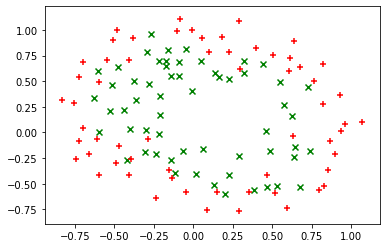

In [96]:
plot_data(X, y)

In [97]:
X_train_new = mapFeature(X_train.iloc[:, 0], X_train.iloc[:, 1], degree)

In [98]:
X_train_new, mean, std = normalize(X_train_new)

In [99]:
X_train_new = prepare_X(X_train_new)
y_train_new = y_train.values.reshape((X_train_new.shape[0], 1))

In [100]:
theta = np.zeros(X_train_new.shape[1]).reshape(X_train_new.shape[1], 1)

In [101]:
X_train_new.shape[1]

15

In [102]:
cost_function(X_train_new, y_train_new, theta)

array([[0.69314718]])

In [116]:
theta_new, Js = gradient_descent(X_train_new, y_train_new, theta, 0.1, 1e-7, 1000000, False)
print(theta_new, len(Js))

[[-0.55182099]
 [ 0.81098901]
 [ 1.42187523]
 [-0.80215654]
 [-1.85864869]
 [-1.55305175]
 [ 0.5349327 ]
 [ 0.36118744]
 [ 1.06138414]
 [ 0.7555679 ]
 [-2.11364231]
 [ 0.77512578]
 [-0.83255875]
 [-1.07542063]
 [-1.82326169]] 10316


In [104]:
cost_function(X_train_new, y_train_new, theta_new)

array([[0.36860413]])

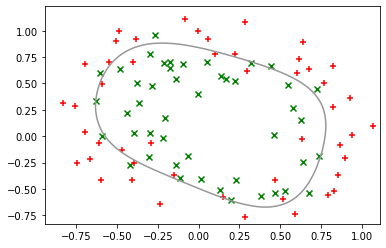

In [105]:
plot_data(X_train, y_train, test = False)
decision_boundary(X_train, y_train, mean, std, theta_new, degree)
plt.show()

In [106]:
y_test_pred = predict(X_test, mean, std, theta_new, degree)

In [107]:
res = pd.DataFrame({'y_actual' : y_test, 'y_pred' : y_test_pred})
print(res)

     y_actual  y_pred
94          0       0
102         0       0
40          1       1
53          1       1
111         0       0
15          1       1
5           1       1
79          0       0
67          0       0
58          0       0
81          0       0
61          0       0
97          0       0
42          1       1
41          1       1
17          1       1
38          1       1
113         0       0
31          1       1
105         0       0
36          1       1
4           1       1
52          1       1
77          0       1


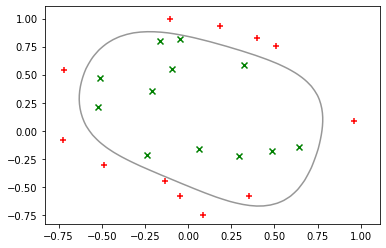

In [108]:
plot_data(X_test, y_test, test = False)
decision_boundary(X_train, y_train, mean, std, theta_new, degree)
plt.show()

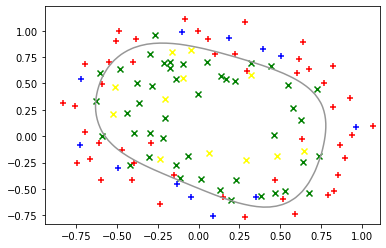

In [109]:
plot_data(X_train, y_train, test = False)
plot_data(X_test, y_test, test = True)
decision_boundary(X_train, y_train, mean, std, theta_new, degree)
plt.show()

In [110]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [111]:
rmse = mean_squared_error(y_test, y_test_pred)**0.5
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
r2_s = r2_score(y_test, y_test_pred)

In [112]:
print('Logistic Regression')
print('RMSE           : ', rmse)
print('MSE            : ', mse)
print('MAE            : ', mae)
print('R2             : ', r2_s)

Logistic Regression
RMSE           :  0.2041241452319315
MSE            :  0.041666666666666664
MAE            :  0.041666666666666664
R2             :  0.8333333333333334
